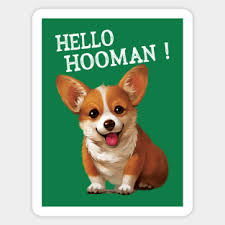

# Welcome to my Titanic EDA , Lets get straight to the topic 😁😁

# Step1:
# Importing All necessary Libraries

In [366]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.matplotlylib as px_plt
import seaborn as sns
import missingno as msno
%matplotlib inline

# for viewing complete np array
import sys
np.set_printoptions(threshold=sys.maxsize)


# Step2:
# Importing Training Dataset

In [305]:
df = pd.read_csv("train.csv")

### viewing dataset

In [306]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### inference of the above table: 
1) Target Variable is Survived(col 1)

2) Name is col is irrelevent wrt target variable (note:not sure abt this but dropping the col anyway)

3) Sex (col 4) need to be label encoded in preprocessing

4) Ticket (col 8) is irrelevent wrt target variable (note:not sure abt this but dropping the col anyway as it cannot be 
   preprocessed)
   
5)  Cabin col also has to be dropped as lot of values are missing

6) Embarked (Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton) has to Be OneHotEncoded in preprocessing


# Step3:
# Visualizing Few graphs wrt dataset

# NOTE: The next step(visualizing) should be done after preprocessing but inorder to visualize the actual data I did it first

### Gender v/s Survived

In [307]:
survived = df[df["Survived"]==1]

Text(0.5, 1.0, 'Gender v/s Survivors Count')

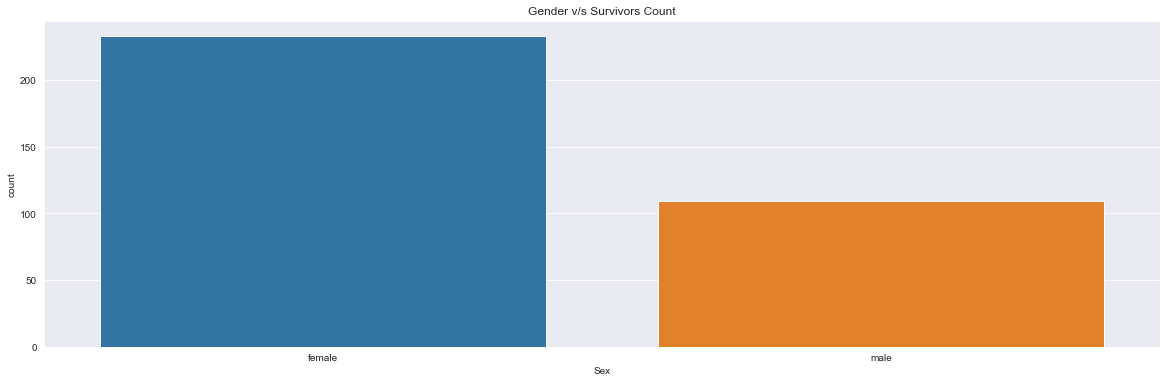

In [308]:
plt.figure(figsize=(20,6))
sns.set_style("darkgrid")
sns.countplot(x="Sex",data=survived)
plt.title("Gender v/s Survivors Count")

#### from This we can indirectly say "Rose two people could have managed on that Door" 🥲

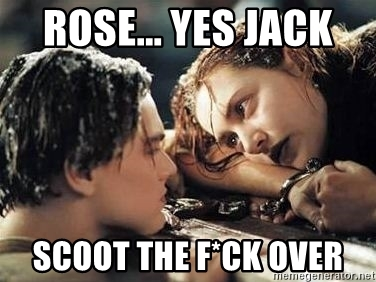

In [309]:
male=df[df["Sex"]=="male"]
male_survived = male[male["Survived"]==1]

In [310]:
female =df[df["Sex"]=="female"]
female_survived = female[female["Survived"]==1]

Text(0.5, 1.0, 'Age of Men v/s Survivors Count')

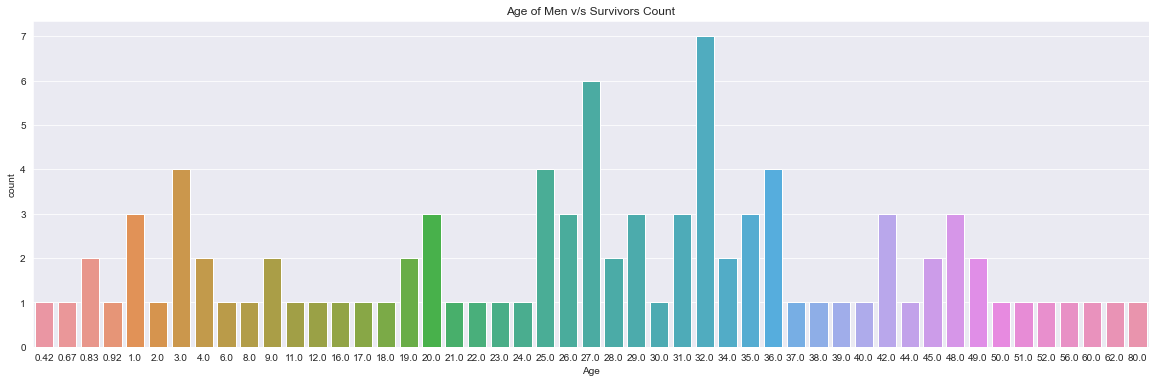

In [311]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
sns.countplot(x="Age",data=male_survived)
plt.title("Age of Men v/s Survivors Count")

Text(0.5, 1.0, 'Age of Women v/s Survivors Count')

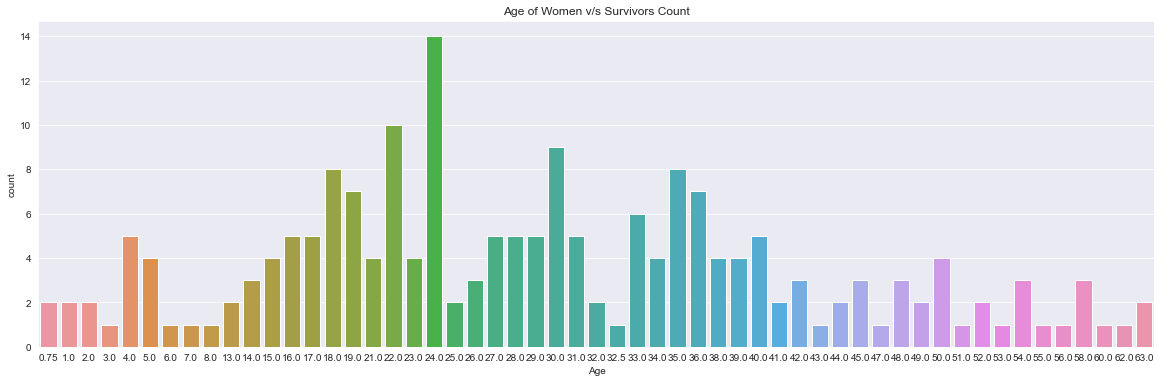

In [312]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
sns.countplot(x="Age",data=female_survived)
plt.title("Age of Women v/s Survivors Count")

### Passenger class v/s Survived

In [313]:
survived = df[df["Survived"]==1]
ded = df[df["Survived"]==0]

Text(0.5, 1.0, 'Passenger class v/s Survivors Count')

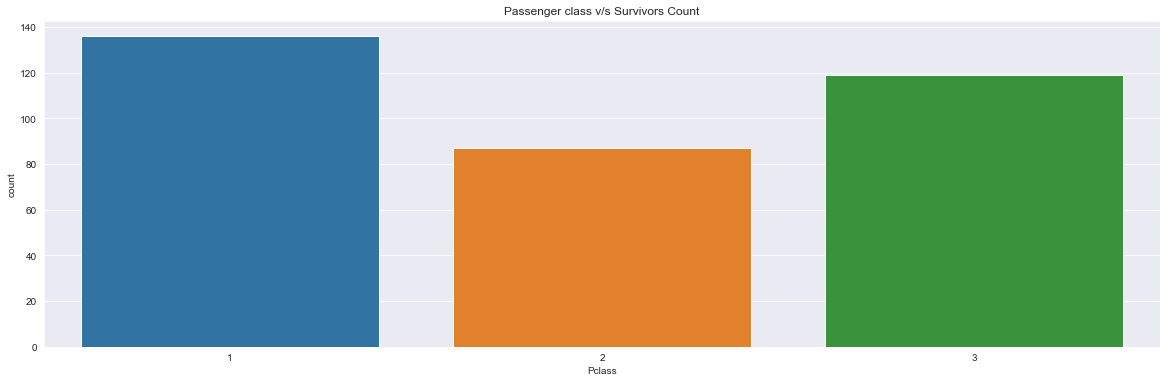

In [314]:
plt.figure(figsize=(20,6))
sns.set_style("darkgrid")
sns.countplot(x="Pclass",data=survived)
plt.title("Passenger class v/s Survivors Count")

### As we Could have gussed it the rich are always given the first preference (probably becuz their ticket includes price for this kind of situation) and here we can see that the 3rd class have more survivors than 2nd class reason could be 1) 3rd class had more passengers so even if less % have survived the nos are more or 2) As in the climax of the movie we saw they revolted which could be the reason more survived   

Text(0.5, 1.0, 'Passenger class v/s Non-Survivors Count')

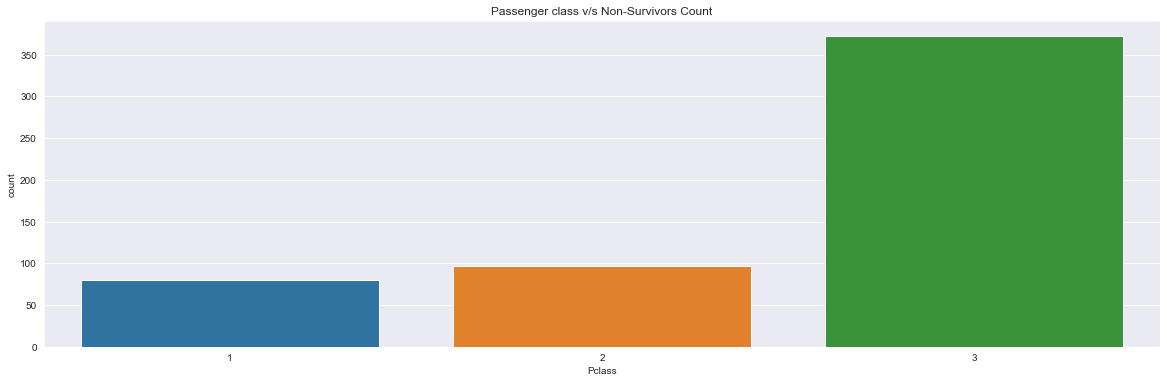

In [315]:
plt.figure(figsize=(20,6))
sns.set_style("darkgrid")
sns.countplot(x="Pclass",data=ded)
plt.title("Passenger class v/s Non-Survivors Count")

### Thus our first guess was correct that the 3rd class had more passengers so even if less % have survived the nos are more 

### Port embarked v/s survived

Text(0.5, 1.0, 'Boarding port v/s Survivors Count')

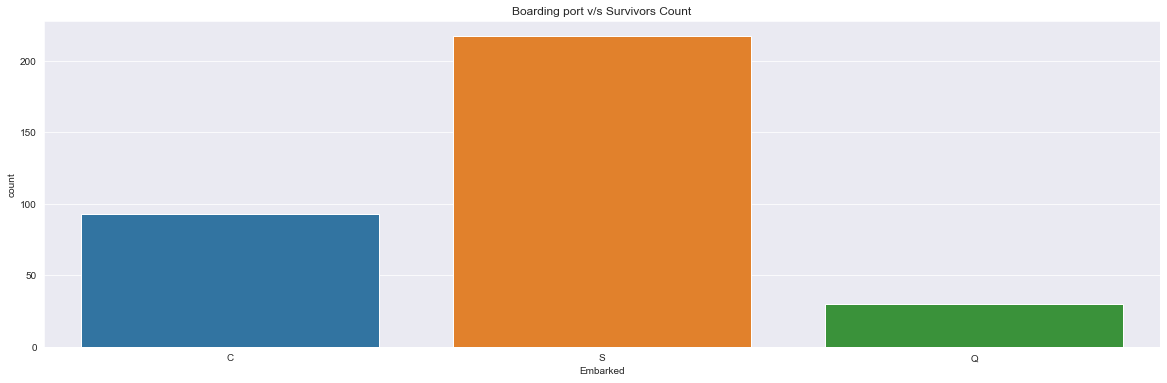

In [316]:
plt.figure(figsize=(20,6))
sns.set_style("darkgrid")
sns.countplot(x="Embarked",data=survived)
plt.title("Boarding port v/s Survivors Count")

### inference: As we can see Most survivors are the ones embarked from Southampton port

# Ticket price v/s Survived

In [317]:
survived_count = survived.groupby(by=["Fare"]).size().reset_index(name="counts")

In [318]:
survived_count

,Fare,counts
0,0.0000,1
1,6.9750,1
2,7.1417,1
3,7.2250,3
4,7.2292,4
...,...,...
148,227.5250,3
149,247.5208,1
150,262.3750,2
151,263.0000,2


<AxesSubplot:xlabel='Fare', ylabel='counts'>

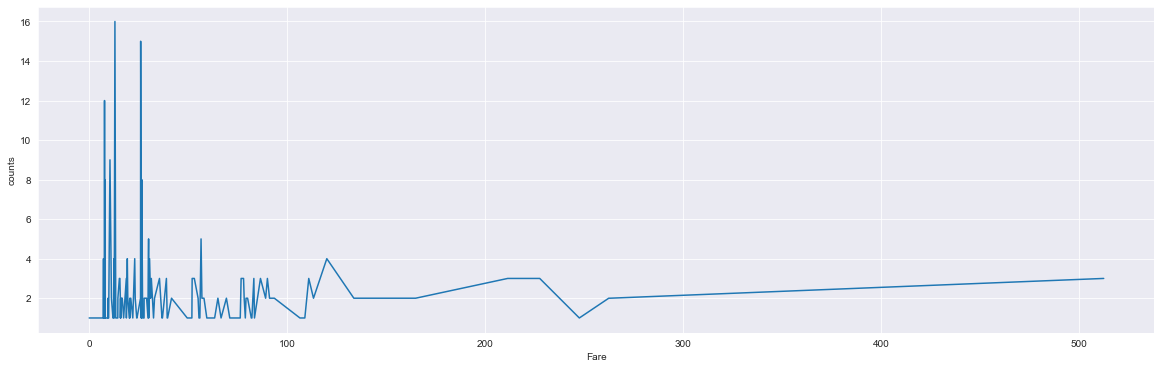

In [319]:
plt.figure(figsize=(20,6))
sns.lineplot(data=survived_count, x='Fare', y='counts')

### Inference: more people have survived who have paid less, this could be because there were less no of people in 1st and 2nd class compared to 3rd class

# step4:
# Preprocessing

# Searching for null values

In [320]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

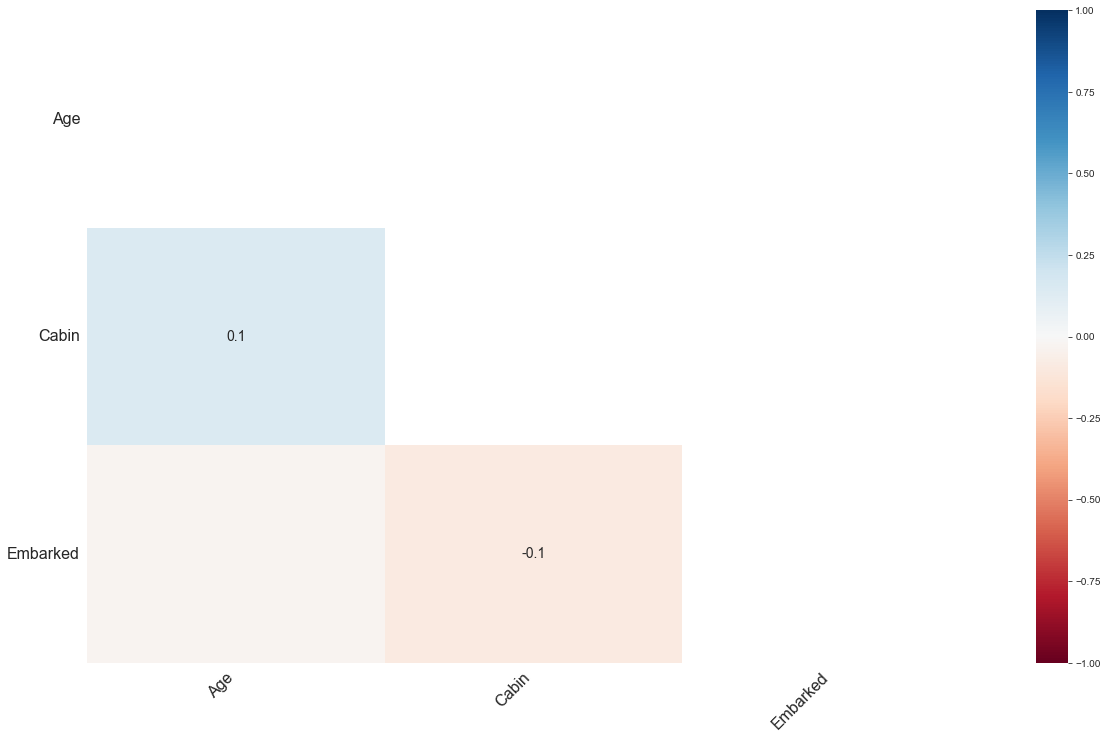

In [321]:
msno.heatmap(df)

### Inference: Age(177),Cabin (687),Embarked(2) have the given no of null values

In [322]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [323]:
df["Age"].fillna(value =29.699118,inplace =True)
df["Embarked"].ffill(inplace = True)

In [324]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<AxesSubplot:>

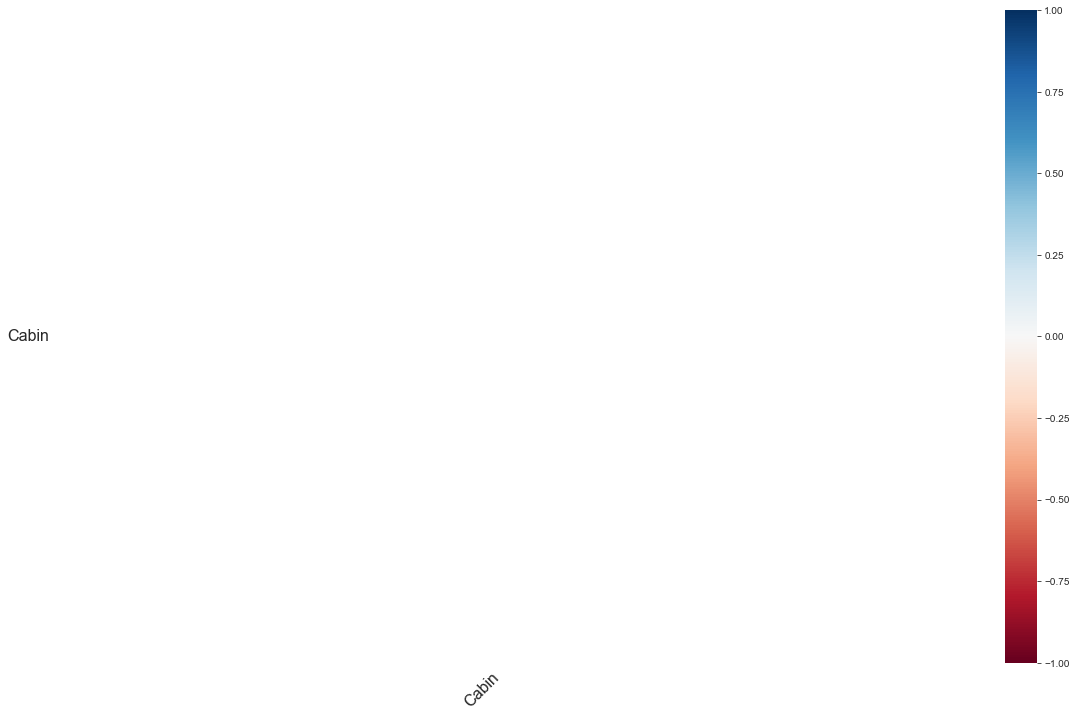

In [325]:
msno.heatmap(df)

### Thus we have filled all null values except cabin

# Dropping all irrevelent Coloumns

In [326]:
df = df.drop(["Name"],axis=1)
df = df.drop(["Ticket"],axis=1)
df = df.drop(["Cabin"],axis=1)

In [327]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [328]:
y_train = df["Survived"]

In [329]:
df = df.drop(["Survived"],axis=1)

In [330]:
df = df.drop(["PassengerId"],axis=1)

In [331]:
X_train = df.iloc[:,:].values

In [332]:
X_train

array([[3, 'male', 22.0, 1, 0, 7.25, 'S'],
       [1, 'female', 38.0, 1, 0, 71.2833, 'C'],
       [3, 'female', 26.0, 0, 0, 7.925, 'S'],
       [1, 'female', 35.0, 1, 0, 53.1, 'S'],
       [3, 'male', 35.0, 0, 0, 8.05, 'S'],
       [3, 'male', 29.699118, 0, 0, 8.4583, 'Q'],
       [1, 'male', 54.0, 0, 0, 51.8625, 'S'],
       [3, 'male', 2.0, 3, 1, 21.075, 'S'],
       [3, 'female', 27.0, 0, 2, 11.1333, 'S'],
       [2, 'female', 14.0, 1, 0, 30.0708, 'C'],
       [3, 'female', 4.0, 1, 1, 16.7, 'S'],
       [1, 'female', 58.0, 0, 0, 26.55, 'S'],
       [3, 'male', 20.0, 0, 0, 8.05, 'S'],
       [3, 'male', 39.0, 1, 5, 31.275, 'S'],
       [3, 'female', 14.0, 0, 0, 7.8542, 'S'],
       [2, 'female', 55.0, 0, 0, 16.0, 'S'],
       [3, 'male', 2.0, 4, 1, 29.125, 'Q'],
       [2, 'male', 29.699118, 0, 0, 13.0, 'S'],
       [3, 'female', 31.0, 1, 0, 18.0, 'S'],
       [3, 'female', 29.699118, 0, 0, 7.225, 'C'],
       [2, 'male', 35.0, 0, 0, 26.0, 'S'],
       [2, 'male', 34.0, 0, 0, 13.0, '

In [333]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Importing test dataset

In [334]:
df_test = pd.read_csv("test.csv",index_col=0)

In [335]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [336]:
del df_test['Name']
del df_test['Ticket']
del df_test['Cabin']

In [337]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
1305,3,male,NaN,0,0,8.0500,S
1306,1,female,39.0,0,0,108.9000,C
1307,3,male,38.5,0,0,7.2500,S


In [338]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [339]:
df_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [340]:
df_test.fillna(value=30.272590,inplace =True)
df_test["Fare"].ffill(inplace = True)

In [341]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [342]:
X_test = df_test.iloc[0:,:].values

In [343]:
X_test

array([[3, 'male', 34.5, 0, 0, 7.8292, 'Q'],
       [3, 'female', 47.0, 1, 0, 7.0, 'S'],
       [2, 'male', 62.0, 0, 0, 9.6875, 'Q'],
       [3, 'male', 27.0, 0, 0, 8.6625, 'S'],
       [3, 'female', 22.0, 1, 1, 12.2875, 'S'],
       [3, 'male', 14.0, 0, 0, 9.225, 'S'],
       [3, 'female', 30.0, 0, 0, 7.6292, 'Q'],
       [2, 'male', 26.0, 1, 1, 29.0, 'S'],
       [3, 'female', 18.0, 0, 0, 7.2292, 'C'],
       [3, 'male', 21.0, 2, 0, 24.15, 'S'],
       [3, 'male', 30.27259, 0, 0, 7.8958, 'S'],
       [1, 'male', 46.0, 0, 0, 26.0, 'S'],
       [1, 'female', 23.0, 1, 0, 82.2667, 'S'],
       [2, 'male', 63.0, 1, 0, 26.0, 'S'],
       [1, 'female', 47.0, 1, 0, 61.175, 'S'],
       [2, 'female', 24.0, 1, 0, 27.7208, 'C'],
       [2, 'male', 35.0, 0, 0, 12.35, 'Q'],
       [3, 'male', 21.0, 0, 0, 7.225, 'C'],
       [3, 'female', 27.0, 1, 0, 7.925, 'S'],
       [3, 'female', 45.0, 0, 0, 7.225, 'C'],
       [1, 'male', 55.0, 1, 0, 59.4, 'C'],
       [3, 'male', 9.0, 0, 1, 3.1708, 'S'],
   

# Onehotencoding Embarked col

In [344]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.fit_transform(X_test))

# Label encoding Sex col

In [347]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train[:,4] = le.fit_transform(X_train[:,4])
X_test[:,4] = le.fit_transform(X_test[:,4])

In [348]:
X_test

array([[0.0, 1.0, 0.0, 3, 1, 34.5, 0, 0, 7.8292],
       [0.0, 0.0, 1.0, 3, 0, 47.0, 1, 0, 7.0],
       [0.0, 1.0, 0.0, 2, 1, 62.0, 0, 0, 9.6875],
       [0.0, 0.0, 1.0, 3, 1, 27.0, 0, 0, 8.6625],
       [0.0, 0.0, 1.0, 3, 0, 22.0, 1, 1, 12.2875],
       [0.0, 0.0, 1.0, 3, 1, 14.0, 0, 0, 9.225],
       [0.0, 1.0, 0.0, 3, 0, 30.0, 0, 0, 7.6292],
       [0.0, 0.0, 1.0, 2, 1, 26.0, 1, 1, 29.0],
       [1.0, 0.0, 0.0, 3, 0, 18.0, 0, 0, 7.2292],
       [0.0, 0.0, 1.0, 3, 1, 21.0, 2, 0, 24.15],
       [0.0, 0.0, 1.0, 3, 1, 30.27259, 0, 0, 7.8958],
       [0.0, 0.0, 1.0, 1, 1, 46.0, 0, 0, 26.0],
       [0.0, 0.0, 1.0, 1, 0, 23.0, 1, 0, 82.2667],
       [0.0, 0.0, 1.0, 2, 1, 63.0, 1, 0, 26.0],
       [0.0, 0.0, 1.0, 1, 0, 47.0, 1, 0, 61.175],
       [1.0, 0.0, 0.0, 2, 0, 24.0, 1, 0, 27.7208],
       [0.0, 1.0, 0.0, 2, 1, 35.0, 0, 0, 12.35],
       [1.0, 0.0, 0.0, 3, 1, 21.0, 0, 0, 7.225],
       [0.0, 0.0, 1.0, 3, 0, 27.0, 1, 0, 7.925],
       [1.0, 0.0, 0.0, 3, 0, 45.0, 0, 0, 7.225],
       [

In [349]:
X_train

array([[0.0, 0.0, 1.0, 3, 1, 22.0, 1, 0, 7.25],
       [1.0, 0.0, 0.0, 1, 0, 38.0, 1, 0, 71.2833],
       [0.0, 0.0, 1.0, 3, 0, 26.0, 0, 0, 7.925],
       [0.0, 0.0, 1.0, 1, 0, 35.0, 1, 0, 53.1],
       [0.0, 0.0, 1.0, 3, 1, 35.0, 0, 0, 8.05],
       [0.0, 1.0, 0.0, 3, 1, 29.699118, 0, 0, 8.4583],
       [0.0, 0.0, 1.0, 1, 1, 54.0, 0, 0, 51.8625],
       [0.0, 0.0, 1.0, 3, 1, 2.0, 3, 1, 21.075],
       [0.0, 0.0, 1.0, 3, 0, 27.0, 0, 2, 11.1333],
       [1.0, 0.0, 0.0, 2, 0, 14.0, 1, 0, 30.0708],
       [0.0, 0.0, 1.0, 3, 0, 4.0, 1, 1, 16.7],
       [0.0, 0.0, 1.0, 1, 0, 58.0, 0, 0, 26.55],
       [0.0, 0.0, 1.0, 3, 1, 20.0, 0, 0, 8.05],
       [0.0, 0.0, 1.0, 3, 1, 39.0, 1, 5, 31.275],
       [0.0, 0.0, 1.0, 3, 0, 14.0, 0, 0, 7.8542],
       [0.0, 0.0, 1.0, 2, 0, 55.0, 0, 0, 16.0],
       [0.0, 1.0, 0.0, 3, 1, 2.0, 4, 1, 29.125],
       [0.0, 0.0, 1.0, 2, 1, 29.699118, 0, 0, 13.0],
       [0.0, 0.0, 1.0, 3, 0, 31.0, 1, 0, 18.0],
       [1.0, 0.0, 0.0, 3, 0, 29.699118, 0, 0, 7.225],
   

In [356]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,max_iter=500)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=0)

In [358]:
classifier.score(X_train,y_train) ##without feature scaling

0.8013468013468014

# feature scaling

In [359]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 5:] = sc.fit_transform(X_train[:, 5:])
X_test[:, 5:] = sc.transform(X_test[:, 5:])

In [360]:
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=0)

In [361]:
classifier.score(X_train,y_train) #with feature scaling

0.8013468013468014

In [363]:
y_test = classifier.predict(X_test)

In [364]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,